In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense
from keras.utils.vis_utils import plot_model
from sklearn.model_selection import train_test_split

# Veriyi yükleme
df = pd.read_csv(r'C:\Users\murat\Desktop\MicrosoftStockData.csv', na_values=['null'], index_col='Date', parse_dates=True, infer_datetime_format=True)

# Veri temizliği ve ölçeklendirme
df.dropna(inplace=True)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

# Veriyi eğitim ve test setlerine bölelim
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]

# LSTM modeli
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# GRU modeli
def create_gru_model():
    model = Sequential()
    model.add(GRU(50, return_sequences=True, input_shape=(100, 1)))
    model.add(GRU(50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Veriyi zaman serisi pencereleme ile hazırlama
def create_timeseries_data(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

# LSTM için zaman serisi veri oluşturma
window_size = 100
X_lstm, y_lstm = create_timeseries_data(train_data, window_size)

# GRU için zaman serisi veri oluşturma
X_gru, y_gru = create_timeseries_data(train_data, window_size)

# LSTM modelini oluşturma
lstm_model = create_lstm_model()

# GRU modelini oluşturma
gru_model = create_gru_model()




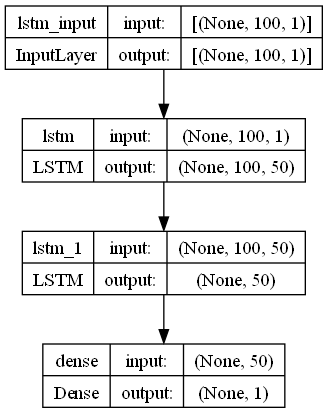

In [2]:
plot_model(lstm_model, show_shapes=True, show_layer_names=True)


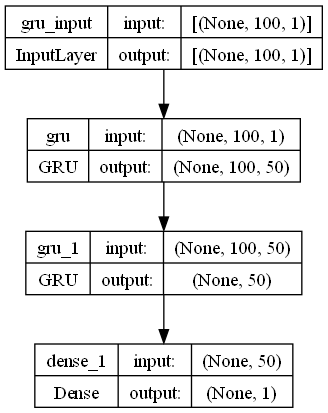

In [3]:
plot_model(gru_model, show_shapes=True, show_layer_names=True)

Epoch 1/100

112/112 [==============================] - 15s 96ms/step - loss: 1.7791e-04

Epoch 2/100

112/112 [==============================] - 11s 95ms/step - loss: 1.4513e-05

Epoch 3/100

112/112 [==============================] - 11s 95ms/step - loss: 1.4053e-05

Epoch 4/100

112/112 [==============================] - 12s 108ms/step - loss: 1.2833e-05

Epoch 5/100

112/112 [==============================] - 12s 107ms/step - loss: 1.2045e-05

Epoch 6/100

112/112 [==============================] - 12s 110ms/step - loss: 1.0927e-05

Epoch 7/100

112/112 [==============================] - 13s 112ms/step - loss: 1.0528e-05

Epoch 8/100

112/112 [==============================] - 13s 117ms/step - loss: 9.2633e-06

Epoch 9/100

112/112 [==============================] - 15s 130ms/step - loss: 8.9654e-06

Epoch 10/100

112/112 [==============================] - 15s 134ms/step - loss: 8.7037e-06

Epoch 11/100

112/112 [==============================] - 13s 120ms/step - loss: 8.1444e-06



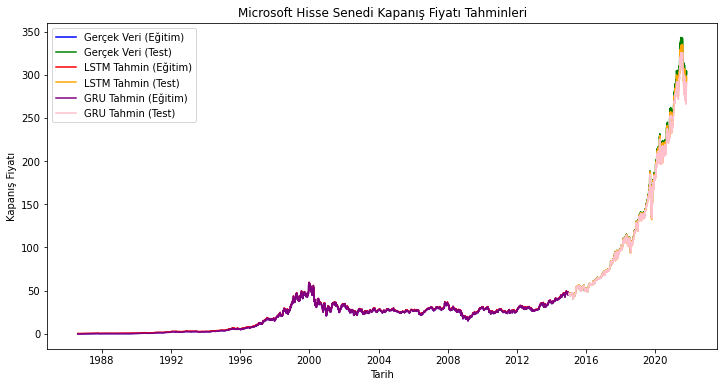

LSTM RMSE (Eğitim): 0.5914368144566031

LSTM RMSE (Test): 4.11152042048356

LSTM MAE (Eğitim): 0.4489836991440116

LSTM MAE (Test): 2.459590953115047

GRU RMSE (Eğitim): 0.5349918120453351

GRU RMSE (Test): 5.851803672013432

GRU MAE (Eğitim): 0.35791662330589513

GRU MAE (Test): 3.509461277580211


In [4]:
# LSTM modelini eğitme
lstm_model.fit(X_lstm, y_lstm, epochs=100, batch_size=64, verbose=1)

# GRU modelini eğitme
gru_model.fit(X_gru, y_gru, epochs=100, batch_size=64, verbose=1)

# Test verilerini oluşturma
X_test_lstm, y_test_lstm = create_timeseries_data(test_data, window_size)
X_test_gru, y_test_gru = create_timeseries_data(test_data, window_size)

# Tahminleri yapma
train_predict_lstm = lstm_model.predict(X_lstm)
test_predict_lstm = lstm_model.predict(X_test_lstm)
train_predict_gru = gru_model.predict(X_gru)
test_predict_gru = gru_model.predict(X_test_gru)

# Tahminleri ters ölçeklendirme
train_predict_lstm = scaler.inverse_transform(train_predict_lstm)
test_predict_lstm = scaler.inverse_transform(test_predict_lstm)
train_predict_gru = scaler.inverse_transform(train_predict_gru)
test_predict_gru = scaler.inverse_transform(test_predict_gru)
y_train_lstm = scaler.inverse_transform(y_lstm)
y_test_lstm = scaler.inverse_transform(y_test_lstm)
y_train_gru = scaler.inverse_transform(y_gru)
y_test_gru = scaler.inverse_transform(y_test_gru)




# Eğitim ve test RMSE değerlerini hesaplama
train_score_lstm = np.sqrt(mean_squared_error(y_train_lstm, train_predict_lstm))
test_score_lstm = np.sqrt(mean_squared_error(y_test_lstm, test_predict_lstm))
train_score_gru = np.sqrt(mean_squared_error(y_train_gru, train_predict_gru))
test_score_gru = np.sqrt(mean_squared_error(y_test_gru, test_predict_gru))

from sklearn.metrics import mean_absolute_error

# Eğitim ve test MAE değerlerini hesaplama
train_mae_lstm = mean_absolute_error(y_train_lstm, train_predict_lstm)
test_mae_lstm = mean_absolute_error(y_test_lstm, test_predict_lstm)
train_mae_gru = mean_absolute_error(y_train_gru, train_predict_gru)
test_mae_gru = mean_absolute_error(y_test_gru, test_predict_gru)

# Tahminleri görselleştirme
plt.figure(figsize=(12, 6))
plt.plot(df.index[window_size:window_size+len(train_predict_lstm)], y_train_lstm, label='Gerçek Veri (Eğitim)', color='blue')
plt.plot(df.index[window_size+len(train_predict_lstm):window_size+len(train_predict_lstm)+len(y_test_lstm)], y_test_lstm.flatten(), label='Gerçek Veri (Test)', color='green')
plt.plot(df.index[window_size:window_size+len(train_predict_lstm)], train_predict_lstm, label='LSTM Tahmin (Eğitim)', color='red')
plt.plot(df.index[window_size+len(train_predict_lstm):window_size+len(train_predict_lstm)+len(test_predict_lstm)], test_predict_lstm.flatten(), label='LSTM Tahmin (Test)', color='orange')
plt.plot(df.index[window_size:window_size+len(train_predict_gru)], train_predict_gru, label='GRU Tahmin (Eğitim)', color='purple')
plt.plot(df.index[window_size+len(train_predict_gru):window_size+len(train_predict_gru)+len(test_predict_gru)], test_predict_gru.flatten(), label='GRU Tahmin (Test)', color='pink')
plt.xlabel('Tarih')
plt.ylabel('Kapanış Fiyatı')
plt.title('Microsoft Hisse Senedi Kapanış Fiyatı Tahminleri')
plt.legend()
plt.show()

# RMSE ve MAE değerlerini yazdırma
print('LSTM RMSE (Eğitim):', train_score_lstm)
print('LSTM RMSE (Test):', test_score_lstm)
print('LSTM MAE (Eğitim):', train_mae_lstm)
print('LSTM MAE (Test):', test_mae_lstm)
print('GRU RMSE (Eğitim):', train_score_gru)
print('GRU RMSE (Test):', test_score_gru)
print('GRU MAE (Eğitim):', train_mae_gru)
print('GRU MAE (Test):', test_mae_gru)


Epoch 1/100

56/56 [==============================] - 9s 161ms/step - loss: 2.2925e-06

Epoch 2/100

56/56 [==============================] - 9s 160ms/step - loss: 2.5057e-06

Epoch 3/100

56/56 [==============================] - 9s 159ms/step - loss: 2.3208e-06

Epoch 4/100

56/56 [==============================] - 9s 161ms/step - loss: 2.3834e-06

Epoch 5/100

56/56 [==============================] - 12s 206ms/step - loss: 2.3012e-06

Epoch 6/100

56/56 [==============================] - 10s 181ms/step - loss: 2.3090e-06

Epoch 7/100

56/56 [==============================] - 10s 179ms/step - loss: 2.3557e-06

Epoch 8/100

56/56 [==============================] - 11s 190ms/step - loss: 2.5686e-06

Epoch 9/100

56/56 [==============================] - 10s 182ms/step - loss: 2.6517e-06

Epoch 10/100

56/56 [==============================] - 10s 185ms/step - loss: 2.2568e-06

Epoch 11/100

56/56 [==============================] - 11s 192ms/step - loss: 2.4003e-06

Epoch 12/100

56/56 [==

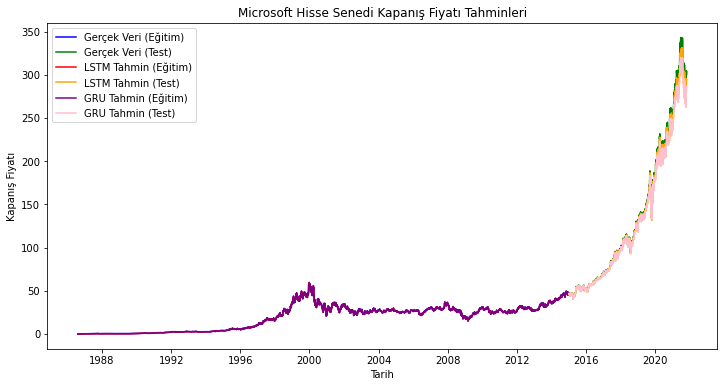

LSTM RMSE (Eğitim): 0.5329524833068933

LSTM RMSE (Test): 5.0504530038919935

LSTM MAE (Eğitim): 0.3422084656651134

LSTM MAE (Test): 3.1170657502427184

GRU RMSE (Eğitim): 0.5599787313937119

GRU RMSE (Test): 7.6157273072663285

GRU MAE (Eğitim): 0.37229145925148854

GRU MAE (Test): 4.711275157595405


In [5]:

# LSTM modelini eğitme
lstm_model.fit(X_lstm, y_lstm, epochs=100, batch_size=128, verbose=1)

# GRU modelini eğitme
gru_model.fit(X_gru, y_gru, epochs=100, batch_size=128, verbose=1)

# Test verilerini oluşturma
X_test_lstm, y_test_lstm = create_timeseries_data(test_data, window_size)
X_test_gru, y_test_gru = create_timeseries_data(test_data, window_size)

# Tahminleri yapma
train_predict_lstm = lstm_model.predict(X_lstm)
test_predict_lstm = lstm_model.predict(X_test_lstm)
train_predict_gru = gru_model.predict(X_gru)
test_predict_gru = gru_model.predict(X_test_gru)

# Tahminleri ters ölçeklendirme
train_predict_lstm = scaler.inverse_transform(train_predict_lstm)
test_predict_lstm = scaler.inverse_transform(test_predict_lstm)
train_predict_gru = scaler.inverse_transform(train_predict_gru)
test_predict_gru = scaler.inverse_transform(test_predict_gru)
y_train_lstm = scaler.inverse_transform(y_lstm)
y_test_lstm = scaler.inverse_transform(y_test_lstm)
y_train_gru = scaler.inverse_transform(y_gru)
y_test_gru = scaler.inverse_transform(y_test_gru)

# Eğitim ve test RMSE değerlerini hesaplama
train_score_lstm = np.sqrt(mean_squared_error(y_train_lstm, train_predict_lstm))
test_score_lstm = np.sqrt(mean_squared_error(y_test_lstm, test_predict_lstm))
train_score_gru = np.sqrt(mean_squared_error(y_train_gru, train_predict_gru))
test_score_gru = np.sqrt(mean_squared_error(y_test_gru, test_predict_gru))

from sklearn.metrics import mean_absolute_error

# Eğitim ve test MAE değerlerini hesaplama
train_mae_lstm = mean_absolute_error(y_train_lstm, train_predict_lstm)
test_mae_lstm = mean_absolute_error(y_test_lstm, test_predict_lstm)
train_mae_gru = mean_absolute_error(y_train_gru, train_predict_gru)
test_mae_gru = mean_absolute_error(y_test_gru, test_predict_gru)

# Tahminleri görselleştirme
plt.figure(figsize=(12, 6))
plt.plot(df.index[window_size:window_size+len(train_predict_lstm)], y_train_lstm, label='Gerçek Veri (Eğitim)', color='blue')
plt.plot(df.index[window_size+len(train_predict_lstm):window_size+len(train_predict_lstm)+len(y_test_lstm)], y_test_lstm.flatten(), label='Gerçek Veri (Test)', color='green')
plt.plot(df.index[window_size:window_size+len(train_predict_lstm)], train_predict_lstm, label='LSTM Tahmin (Eğitim)', color='red')
plt.plot(df.index[window_size+len(train_predict_lstm):window_size+len(train_predict_lstm)+len(test_predict_lstm)], test_predict_lstm.flatten(), label='LSTM Tahmin (Test)', color='orange')
plt.plot(df.index[window_size:window_size+len(train_predict_gru)], train_predict_gru, label='GRU Tahmin (Eğitim)', color='purple')
plt.plot(df.index[window_size+len(train_predict_gru):window_size+len(train_predict_gru)+len(test_predict_gru)], test_predict_gru.flatten(), label='GRU Tahmin (Test)', color='pink')
plt.xlabel('Tarih')
plt.ylabel('Kapanış Fiyatı')
plt.title('Microsoft Hisse Senedi Kapanış Fiyatı Tahminleri')
plt.legend()
plt.show()

# RMSE ve MAE değerlerini yazdırma
print('LSTM RMSE (Eğitim):', train_score_lstm)
print('LSTM RMSE (Test):', test_score_lstm)
print('LSTM MAE (Eğitim):', train_mae_lstm)
print('LSTM MAE (Test):', test_mae_lstm)
print('GRU RMSE (Eğitim):', train_score_gru)
print('GRU RMSE (Test):', test_score_gru)
print('GRU MAE (Eğitim):', train_mae_gru)
print('GRU MAE (Test):', test_mae_gru)



Epoch 1/200

112/112 [==============================] - 13s 114ms/step - loss: 2.3564e-06

Epoch 2/200

112/112 [==============================] - 13s 114ms/step - loss: 3.0486e-06

Epoch 3/200

112/112 [==============================] - 13s 116ms/step - loss: 2.4740e-06

Epoch 4/200

112/112 [==============================] - 13s 117ms/step - loss: 2.3898e-06

Epoch 5/200

112/112 [==============================] - 13s 114ms/step - loss: 2.7085e-06

Epoch 6/200

112/112 [==============================] - 13s 117ms/step - loss: 2.6324e-06

Epoch 7/200

112/112 [==============================] - 13s 117ms/step - loss: 2.3485e-06

Epoch 8/200

112/112 [==============================] - 13s 116ms/step - loss: 2.5572e-06

Epoch 9/200

112/112 [==============================] - 13s 115ms/step - loss: 2.5340e-06

Epoch 10/200

112/112 [==============================] - 13s 116ms/step - loss: 2.7310e-06

Epoch 11/200

112/112 [==============================] - 13s 115ms/step - loss: 2.3971e-0

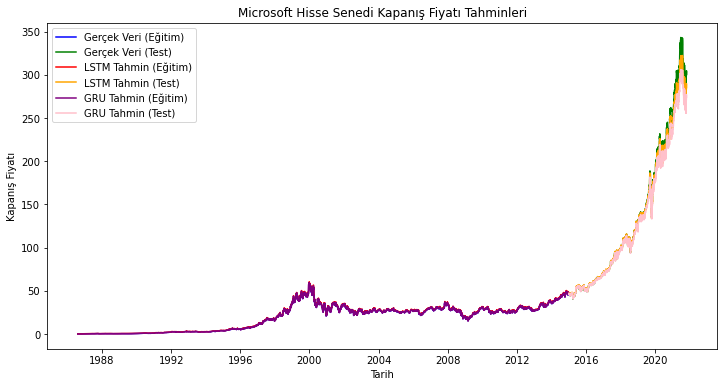

LSTM RMSE (Eğitim): 0.6338013890027054

LSTM RMSE (Test): 6.435150750058879

LSTM MAE (Eğitim): 0.4403058881112755

LSTM MAE (Test): 3.666325920586472

GRU RMSE (Eğitim): 0.5001135288793006

GRU RMSE (Test): 10.888620205830689

GRU MAE (Eğitim): 0.2823596910726099

GRU MAE (Test): 6.171724178167771


In [6]:
# LSTM modelini eğitme
lstm_model.fit(X_lstm, y_lstm, epochs=200, batch_size=64, verbose=1)

# GRU modelini eğitme
gru_model.fit(X_gru, y_gru, epochs=200, batch_size=64, verbose=1)

# Test verilerini oluşturma
X_test_lstm, y_test_lstm = create_timeseries_data(test_data, window_size)
X_test_gru, y_test_gru = create_timeseries_data(test_data, window_size)

# Tahminleri yapma
train_predict_lstm = lstm_model.predict(X_lstm)
test_predict_lstm = lstm_model.predict(X_test_lstm)
train_predict_gru = gru_model.predict(X_gru)
test_predict_gru = gru_model.predict(X_test_gru)

# Tahminleri ters ölçeklendirme
train_predict_lstm = scaler.inverse_transform(train_predict_lstm)
test_predict_lstm = scaler.inverse_transform(test_predict_lstm)
train_predict_gru = scaler.inverse_transform(train_predict_gru)
test_predict_gru = scaler.inverse_transform(test_predict_gru)
y_train_lstm = scaler.inverse_transform(y_lstm)
y_test_lstm = scaler.inverse_transform(y_test_lstm)
y_train_gru = scaler.inverse_transform(y_gru)
y_test_gru = scaler.inverse_transform(y_test_gru)

# Eğitim ve test RMSE değerlerini hesaplama
train_score_lstm = np.sqrt(mean_squared_error(y_train_lstm, train_predict_lstm))
test_score_lstm = np.sqrt(mean_squared_error(y_test_lstm, test_predict_lstm))
train_score_gru = np.sqrt(mean_squared_error(y_train_gru, train_predict_gru))
test_score_gru = np.sqrt(mean_squared_error(y_test_gru, test_predict_gru))

from sklearn.metrics import mean_absolute_error

# Eğitim ve test MAE değerlerini hesaplama
train_mae_lstm = mean_absolute_error(y_train_lstm, train_predict_lstm)
test_mae_lstm = mean_absolute_error(y_test_lstm, test_predict_lstm)
train_mae_gru = mean_absolute_error(y_train_gru, train_predict_gru)
test_mae_gru = mean_absolute_error(y_test_gru, test_predict_gru)

# Tahminleri görselleştirme
plt.figure(figsize=(12, 6))
plt.plot(df.index[window_size:window_size+len(train_predict_lstm)], y_train_lstm, label='Gerçek Veri (Eğitim)', color='blue')
plt.plot(df.index[window_size+len(train_predict_lstm):window_size+len(train_predict_lstm)+len(y_test_lstm)], y_test_lstm.flatten(), label='Gerçek Veri (Test)', color='green')
plt.plot(df.index[window_size:window_size+len(train_predict_lstm)], train_predict_lstm, label='LSTM Tahmin (Eğitim)', color='red')
plt.plot(df.index[window_size+len(train_predict_lstm):window_size+len(train_predict_lstm)+len(test_predict_lstm)], test_predict_lstm.flatten(), label='LSTM Tahmin (Test)', color='orange')
plt.plot(df.index[window_size:window_size+len(train_predict_gru)], train_predict_gru, label='GRU Tahmin (Eğitim)', color='purple')
plt.plot(df.index[window_size+len(train_predict_gru):window_size+len(train_predict_gru)+len(test_predict_gru)], test_predict_gru.flatten(), label='GRU Tahmin (Test)', color='pink')
plt.xlabel('Tarih')
plt.ylabel('Kapanış Fiyatı')
plt.title('Microsoft Hisse Senedi Kapanış Fiyatı Tahminleri')
plt.legend()
plt.show()

# RMSE ve MAE değerlerini yazdırma
print('LSTM RMSE (Eğitim):', train_score_lstm)
print('LSTM RMSE (Test):', test_score_lstm)
print('LSTM MAE (Eğitim):', train_mae_lstm)
print('LSTM MAE (Test):', test_mae_lstm)
print('GRU RMSE (Eğitim):', train_score_gru)
print('GRU RMSE (Test):', test_score_gru)
print('GRU MAE (Eğitim):', train_mae_gru)
print('GRU MAE (Test):', test_mae_gru)

Epoch 1/400

56/56 [==============================] - 9s 164ms/step - loss: 2.2550e-06

Epoch 2/400

56/56 [==============================] - 9s 163ms/step - loss: 2.2216e-06

Epoch 3/400

56/56 [==============================] - 9s 163ms/step - loss: 2.2207e-06

Epoch 4/400

56/56 [==============================] - 9s 158ms/step - loss: 2.3536e-06

Epoch 5/400

56/56 [==============================] - 9s 163ms/step - loss: 2.3161e-06

Epoch 6/400

56/56 [==============================] - 11s 190ms/step - loss: 2.2052e-06

Epoch 7/400

56/56 [==============================] - 11s 201ms/step - loss: 2.2309e-06

Epoch 8/400

56/56 [==============================] - 11s 189ms/step - loss: 2.2450e-06

Epoch 9/400

56/56 [==============================] - 11s 193ms/step - loss: 2.2212e-06

Epoch 10/400

56/56 [==============================] - 10s 186ms/step - loss: 2.4539e-06

Epoch 11/400

56/56 [==============================] - 10s 180ms/step - loss: 2.3235e-06

Epoch 12/400

56/56 [===

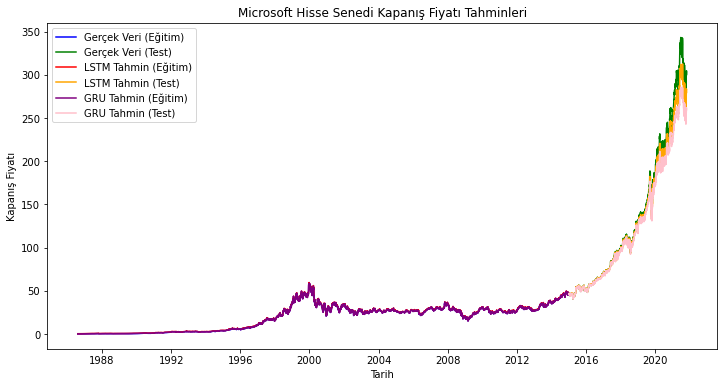

LSTM RMSE (Eğitim): 0.5657725675521967

LSTM RMSE (Test): 9.302574404206833

LSTM MAE (Eğitim): 0.41362604538974956

LSTM MAE (Test): 5.401700609984853

GRU RMSE (Eğitim): 0.5167379024930933

GRU RMSE (Test): 16.84084633522975

GRU MAE (Eğitim): 0.3143013585687723

GRU MAE (Test): 9.705479388173357


In [7]:
# LSTM modelini eğitme
lstm_model.fit(X_lstm, y_lstm, epochs=400, batch_size=128, verbose=1)

# GRU modelini eğitme
gru_model.fit(X_gru, y_gru, epochs=400, batch_size=128, verbose=1)

# Test verilerini oluşturma
X_test_lstm, y_test_lstm = create_timeseries_data(test_data, window_size)
X_test_gru, y_test_gru = create_timeseries_data(test_data, window_size)

# Tahminleri yapma
train_predict_lstm = lstm_model.predict(X_lstm)
test_predict_lstm = lstm_model.predict(X_test_lstm)
train_predict_gru = gru_model.predict(X_gru)
test_predict_gru = gru_model.predict(X_test_gru)

# Tahminleri ters ölçeklendirme
train_predict_lstm = scaler.inverse_transform(train_predict_lstm)
test_predict_lstm = scaler.inverse_transform(test_predict_lstm)
train_predict_gru = scaler.inverse_transform(train_predict_gru)
test_predict_gru = scaler.inverse_transform(test_predict_gru)
y_train_lstm = scaler.inverse_transform(y_lstm)
y_test_lstm = scaler.inverse_transform(y_test_lstm)
y_train_gru = scaler.inverse_transform(y_gru)
y_test_gru = scaler.inverse_transform(y_test_gru)

# Eğitim ve test RMSE değerlerini hesaplama
train_score_lstm = np.sqrt(mean_squared_error(y_train_lstm, train_predict_lstm))
test_score_lstm = np.sqrt(mean_squared_error(y_test_lstm, test_predict_lstm))
train_score_gru = np.sqrt(mean_squared_error(y_train_gru, train_predict_gru))
test_score_gru = np.sqrt(mean_squared_error(y_test_gru, test_predict_gru))

from sklearn.metrics import mean_absolute_error

# Eğitim ve test MAE değerlerini hesaplama
train_mae_lstm = mean_absolute_error(y_train_lstm, train_predict_lstm)
test_mae_lstm = mean_absolute_error(y_test_lstm, test_predict_lstm)
train_mae_gru = mean_absolute_error(y_train_gru, train_predict_gru)
test_mae_gru = mean_absolute_error(y_test_gru, test_predict_gru)

# Tahminleri görselleştirme
plt.figure(figsize=(12, 6))
plt.plot(df.index[window_size:window_size+len(train_predict_lstm)], y_train_lstm, label='Gerçek Veri (Eğitim)', color='blue')
plt.plot(df.index[window_size+len(train_predict_lstm):window_size+len(train_predict_lstm)+len(y_test_lstm)], y_test_lstm.flatten(), label='Gerçek Veri (Test)', color='green')
plt.plot(df.index[window_size:window_size+len(train_predict_lstm)], train_predict_lstm, label='LSTM Tahmin (Eğitim)', color='red')
plt.plot(df.index[window_size+len(train_predict_lstm):window_size+len(train_predict_lstm)+len(test_predict_lstm)], test_predict_lstm.flatten(), label='LSTM Tahmin (Test)', color='orange')
plt.plot(df.index[window_size:window_size+len(train_predict_gru)], train_predict_gru, label='GRU Tahmin (Eğitim)', color='purple')
plt.plot(df.index[window_size+len(train_predict_gru):window_size+len(train_predict_gru)+len(test_predict_gru)], test_predict_gru.flatten(), label='GRU Tahmin (Test)', color='pink')
plt.xlabel('Tarih')
plt.ylabel('Kapanış Fiyatı')
plt.title('Microsoft Hisse Senedi Kapanış Fiyatı Tahminleri')
plt.legend()
plt.show()

# RMSE ve MAE değerlerini yazdırma
print('LSTM RMSE (Eğitim):', train_score_lstm)
print('LSTM RMSE (Test):', test_score_lstm)
print('LSTM MAE (Eğitim):', train_mae_lstm)
print('LSTM MAE (Test):', test_mae_lstm)
print('GRU RMSE (Eğitim):', train_score_gru)
print('GRU RMSE (Test):', test_score_gru)
print('GRU MAE (Eğitim):', train_mae_gru)
print('GRU MAE (Test):', test_mae_gru)

Epoch 1/400

112/112 [==============================] - 13s 114ms/step - loss: 2.4022e-06

Epoch 2/400

112/112 [==============================] - 13s 113ms/step - loss: 2.3684e-06

Epoch 3/400

112/112 [==============================] - 13s 117ms/step - loss: 2.4171e-06

Epoch 4/400

112/112 [==============================] - 13s 113ms/step - loss: 2.3332e-06

Epoch 5/400

112/112 [==============================] - 13s 114ms/step - loss: 2.4465e-06

Epoch 6/400

112/112 [==============================] - 13s 114ms/step - loss: 2.3256e-06

Epoch 7/400

112/112 [==============================] - 13s 114ms/step - loss: 2.3001e-06

Epoch 8/400

112/112 [==============================] - 13s 116ms/step - loss: 2.2846e-06

Epoch 9/400

112/112 [==============================] - 13s 117ms/step - loss: 2.3989e-06

Epoch 10/400

112/112 [==============================] - 13s 115ms/step - loss: 2.2975e-06

Epoch 11/400

112/112 [==============================] - 13s 114ms/step - loss: 2.3283e-0

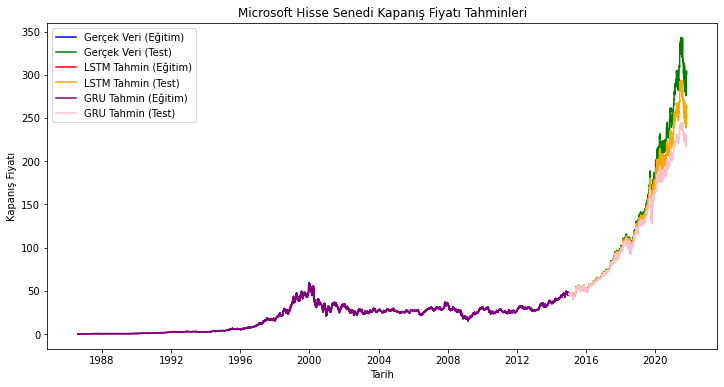

LSTM RMSE (Eğitim): 0.510246656490729

LSTM RMSE (Test): 15.642621402052297

LSTM MAE (Eğitim): 0.30940265838295805

LSTM MAE (Test): 8.695691838595177

GRU RMSE (Eğitim): 0.5422697855639177

GRU RMSE (Test): 29.43811419701005

GRU MAE (Eğitim): 0.34584719241725914

GRU MAE (Test): 16.640875863117447


In [8]:
# LSTM modelini eğitme
lstm_model.fit(X_lstm, y_lstm, epochs=400, batch_size=64, verbose=1)

# GRU modelini eğitme
gru_model.fit(X_gru, y_gru, epochs=400, batch_size=64, verbose=1)

# Test verilerini oluşturma
X_test_lstm, y_test_lstm = create_timeseries_data(test_data, window_size)
X_test_gru, y_test_gru = create_timeseries_data(test_data, window_size)

# Tahminleri yapma
train_predict_lstm = lstm_model.predict(X_lstm)
test_predict_lstm = lstm_model.predict(X_test_lstm)
train_predict_gru = gru_model.predict(X_gru)
test_predict_gru = gru_model.predict(X_test_gru)

# Tahminleri ters ölçeklendirme
train_predict_lstm = scaler.inverse_transform(train_predict_lstm)
test_predict_lstm = scaler.inverse_transform(test_predict_lstm)
train_predict_gru = scaler.inverse_transform(train_predict_gru)
test_predict_gru = scaler.inverse_transform(test_predict_gru)
y_train_lstm = scaler.inverse_transform(y_lstm)
y_test_lstm = scaler.inverse_transform(y_test_lstm)
y_train_gru = scaler.inverse_transform(y_gru)
y_test_gru = scaler.inverse_transform(y_test_gru)

# Eğitim ve test RMSE değerlerini hesaplama
train_score_lstm = np.sqrt(mean_squared_error(y_train_lstm, train_predict_lstm))
test_score_lstm = np.sqrt(mean_squared_error(y_test_lstm, test_predict_lstm))
train_score_gru = np.sqrt(mean_squared_error(y_train_gru, train_predict_gru))
test_score_gru = np.sqrt(mean_squared_error(y_test_gru, test_predict_gru))

from sklearn.metrics import mean_absolute_error

# Eğitim ve test MAE değerlerini hesaplama
train_mae_lstm = mean_absolute_error(y_train_lstm, train_predict_lstm)
test_mae_lstm = mean_absolute_error(y_test_lstm, test_predict_lstm)
train_mae_gru = mean_absolute_error(y_train_gru, train_predict_gru)
test_mae_gru = mean_absolute_error(y_test_gru, test_predict_gru)

# Tahminleri görselleştirme
plt.figure(figsize=(12, 6))
plt.plot(df.index[window_size:window_size+len(train_predict_lstm)], y_train_lstm, label='Gerçek Veri (Eğitim)', color='blue')
plt.plot(df.index[window_size+len(train_predict_lstm):window_size+len(train_predict_lstm)+len(y_test_lstm)], y_test_lstm.flatten(), label='Gerçek Veri (Test)', color='green')
plt.plot(df.index[window_size:window_size+len(train_predict_lstm)], train_predict_lstm, label='LSTM Tahmin (Eğitim)', color='red')
plt.plot(df.index[window_size+len(train_predict_lstm):window_size+len(train_predict_lstm)+len(test_predict_lstm)], test_predict_lstm.flatten(), label='LSTM Tahmin (Test)', color='orange')
plt.plot(df.index[window_size:window_size+len(train_predict_gru)], train_predict_gru, label='GRU Tahmin (Eğitim)', color='purple')
plt.plot(df.index[window_size+len(train_predict_gru):window_size+len(train_predict_gru)+len(test_predict_gru)], test_predict_gru.flatten(), label='GRU Tahmin (Test)', color='pink')
plt.xlabel('Tarih')
plt.ylabel('Kapanış Fiyatı')
plt.title('Microsoft Hisse Senedi Kapanış Fiyatı Tahminleri')
plt.legend()
plt.show()

# RMSE ve MAE değerlerini yazdırma
print('LSTM RMSE (Eğitim):', train_score_lstm)
print('LSTM RMSE (Test):', test_score_lstm)
print('LSTM MAE (Eğitim):', train_mae_lstm)
print('LSTM MAE (Test):', test_mae_lstm)
print('GRU RMSE (Eğitim):', train_score_gru)
print('GRU RMSE (Test):', test_score_gru)
print('GRU MAE (Eğitim):', train_mae_gru)
print('GRU MAE (Test):', test_mae_gru)

Epoch 1/400

224/224 [==============================] - 18s 78ms/step - loss: 2.4539e-06

Epoch 2/400

224/224 [==============================] - 17s 76ms/step - loss: 2.4449e-06

Epoch 3/400

224/224 [==============================] - 17s 76ms/step - loss: 2.4783e-06

Epoch 4/400

224/224 [==============================] - 17s 75ms/step - loss: 2.3910e-06

Epoch 5/400

224/224 [==============================] - 16s 73ms/step - loss: 2.4120e-06

Epoch 6/400

224/224 [==============================] - 16s 73ms/step - loss: 2.3425e-06

Epoch 7/400

224/224 [==============================] - 17s 75ms/step - loss: 2.4456e-06

Epoch 8/400

224/224 [==============================] - 16s 73ms/step - loss: 2.3962e-06

Epoch 9/400

224/224 [==============================] - 16s 72ms/step - loss: 2.5144e-06

Epoch 10/400

224/224 [==============================] - 18s 79ms/step - loss: 2.4102e-06

Epoch 11/400

224/224 [==============================] - 18s 82ms/step - loss: 2.3981e-06

Epoch 12

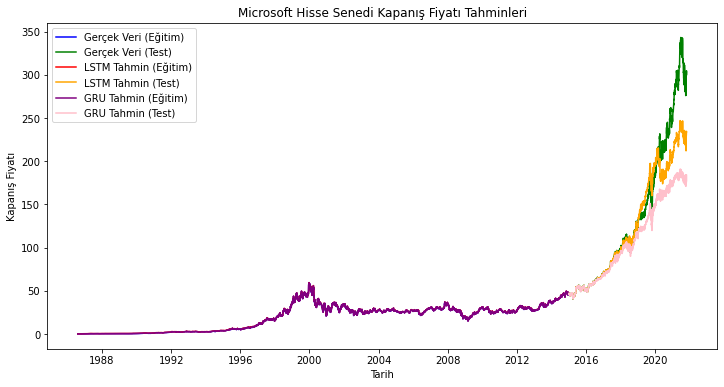

LSTM RMSE (Eğitim): 0.5212260863564158

LSTM RMSE (Test): 29.016591848016592

LSTM MAE (Eğitim): 0.3452666337574963

LSTM MAE (Test): 15.523663227055048

GRU RMSE (Eğitim): 0.5020108043867197

GRU RMSE (Test): 48.62462461706408

GRU MAE (Eğitim): 0.2944290275048764

GRU MAE (Test): 27.76725960834597


In [9]:
# LSTM modelini eğitme
lstm_model.fit(X_lstm, y_lstm, epochs=400, batch_size=32, verbose=1)

# GRU modelini eğitme
gru_model.fit(X_gru, y_gru, epochs=400, batch_size=32, verbose=1)

# Test verilerini oluşturma
X_test_lstm, y_test_lstm = create_timeseries_data(test_data, window_size)
X_test_gru, y_test_gru = create_timeseries_data(test_data, window_size)

# Tahminleri yapma
train_predict_lstm = lstm_model.predict(X_lstm)
test_predict_lstm = lstm_model.predict(X_test_lstm)
train_predict_gru = gru_model.predict(X_gru)
test_predict_gru = gru_model.predict(X_test_gru)

# Tahminleri ters ölçeklendirme
train_predict_lstm = scaler.inverse_transform(train_predict_lstm)
test_predict_lstm = scaler.inverse_transform(test_predict_lstm)
train_predict_gru = scaler.inverse_transform(train_predict_gru)
test_predict_gru = scaler.inverse_transform(test_predict_gru)
y_train_lstm = scaler.inverse_transform(y_lstm)
y_test_lstm = scaler.inverse_transform(y_test_lstm)
y_train_gru = scaler.inverse_transform(y_gru)
y_test_gru = scaler.inverse_transform(y_test_gru)

# Eğitim ve test RMSE değerlerini hesaplama
train_score_lstm = np.sqrt(mean_squared_error(y_train_lstm, train_predict_lstm))
test_score_lstm = np.sqrt(mean_squared_error(y_test_lstm, test_predict_lstm))
train_score_gru = np.sqrt(mean_squared_error(y_train_gru, train_predict_gru))
test_score_gru = np.sqrt(mean_squared_error(y_test_gru, test_predict_gru))

from sklearn.metrics import mean_absolute_error

# Eğitim ve test MAE değerlerini hesaplama
train_mae_lstm = mean_absolute_error(y_train_lstm, train_predict_lstm)
test_mae_lstm = mean_absolute_error(y_test_lstm, test_predict_lstm)
train_mae_gru = mean_absolute_error(y_train_gru, train_predict_gru)
test_mae_gru = mean_absolute_error(y_test_gru, test_predict_gru)

# Tahminleri görselleştirme
plt.figure(figsize=(12, 6))
plt.plot(df.index[window_size:window_size+len(train_predict_lstm)], y_train_lstm, label='Gerçek Veri (Eğitim)', color='blue')
plt.plot(df.index[window_size+len(train_predict_lstm):window_size+len(train_predict_lstm)+len(y_test_lstm)], y_test_lstm.flatten(), label='Gerçek Veri (Test)', color='green')
plt.plot(df.index[window_size:window_size+len(train_predict_lstm)], train_predict_lstm, label='LSTM Tahmin (Eğitim)', color='red')
plt.plot(df.index[window_size+len(train_predict_lstm):window_size+len(train_predict_lstm)+len(test_predict_lstm)], test_predict_lstm.flatten(), label='LSTM Tahmin (Test)', color='orange')
plt.plot(df.index[window_size:window_size+len(train_predict_gru)], train_predict_gru, label='GRU Tahmin (Eğitim)', color='purple')
plt.plot(df.index[window_size+len(train_predict_gru):window_size+len(train_predict_gru)+len(test_predict_gru)], test_predict_gru.flatten(), label='GRU Tahmin (Test)', color='pink')
plt.xlabel('Tarih')
plt.ylabel('Kapanış Fiyatı')
plt.title('Microsoft Hisse Senedi Kapanış Fiyatı Tahminleri')
plt.legend()
plt.show()

# RMSE ve MAE değerlerini yazdırma
print('LSTM RMSE (Eğitim):', train_score_lstm)
print('LSTM RMSE (Test):', test_score_lstm)
print('LSTM MAE (Eğitim):', train_mae_lstm)
print('LSTM MAE (Test):', test_mae_lstm)
print('GRU RMSE (Eğitim):', train_score_gru)
print('GRU RMSE (Test):', test_score_gru)
print('GRU MAE (Eğitim):', train_mae_gru)
print('GRU MAE (Test):', test_mae_gru)